## CREDIT CARD FRAUD DETECTION USING WITH LOGISTIC REGRESSION

In [1]:
# importing liblaries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [3]:
# Loading the dataset
data=pd.read_csv("C:\\Users\\somen\\Downloads\\creditcard.csv\\creditcard.csv")

In [4]:
# Display the first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Assuming 'Class' is the label column and other columns are features
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)


In [10]:
# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56855     9]
 [   41    57]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)


In [14]:
print(f"AUC-PR: {auc_pr}")


AUC-PR: 0.7559867636143601


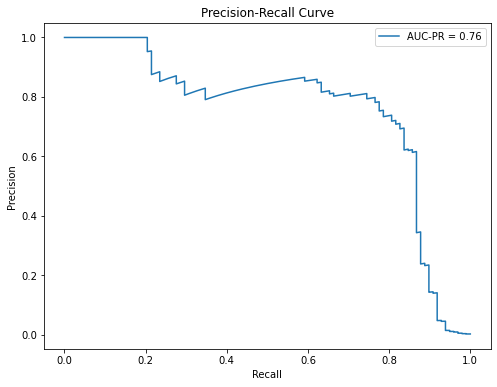

In [15]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

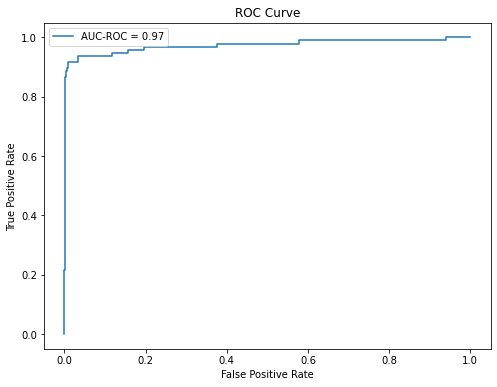

In [16]:
# Calculate false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC-ROC
auc_roc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

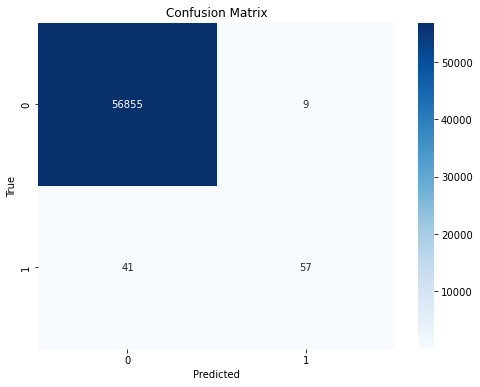

In [17]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Calculate the number of fraudulent transactions in each class
class_counts = data['Class'].value_counts()
fraud_counts = class_counts[1]

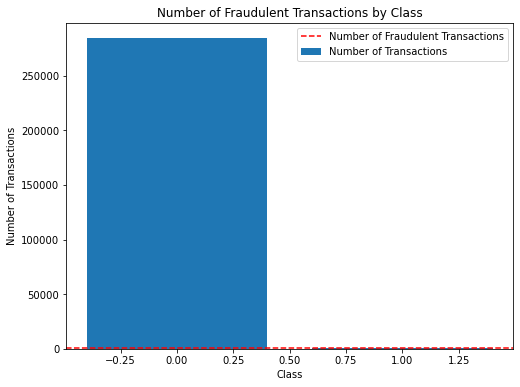

In [19]:
# Create a bar graph of the number of fraudulent transactions in each class
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, label='Number of Transactions')
plt.axhline(y=fraud_counts, color='r', linestyle='--', label='Number of Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Number of Fraudulent Transactions by Class')
plt.legend()
plt.show()

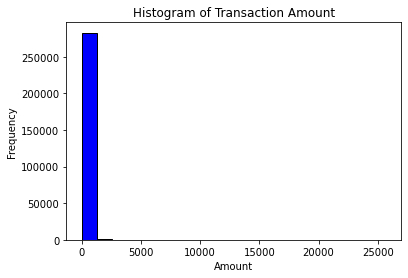

In [20]:
feature_name = 'Amount'
# Plot histogram
plt.hist(data[feature_name], bins=20, color='blue', edgecolor='black')
# Add labels and title
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
# Show plot
plt.show()

In [21]:
# Assuming 'Time' is a feature representing the time of each transaction
# Convert 'Time' to datetime format if needed
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [22]:
# Separate fraudulent and non-fraudulent transactions
fraudulent_transactions = data[data['Class'] == 1]
non_fraudulent_transactions = data[data['Class'] == 0]

In [23]:
# Calculate average transaction amount over time for fraudulent transactions
fraudulent_avg_amount = fraudulent_transactions.groupby('Time')['Amount'].mean()


In [24]:
# Calculate average transaction amount over time for non-fraudulent transactions
non_fraudulent_avg_amount = non_fraudulent_transactions.groupby('Time')['Amount'].mean()

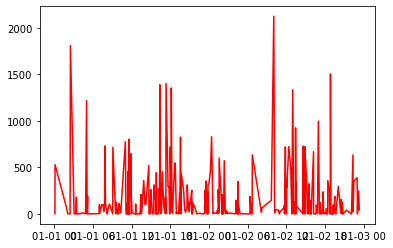

In [25]:
# Plot line graph for fraudulent transactions
plt.plot(fraudulent_avg_amount.index, fraudulent_avg_amount.values, color='red', label='Fraudulent')

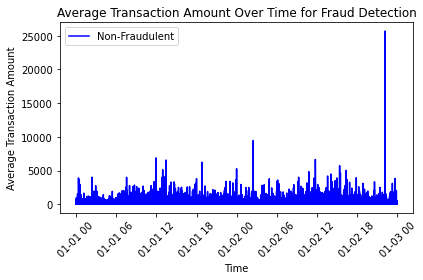

In [26]:
# Plot line graph for non-fraudulent transactions
plt.plot(non_fraudulent_avg_amount.index, non_fraudulent_avg_amount.values, color='blue', label='Non-Fraudulent')
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount Over Time for Fraud Detection')
# Add legend
plt.legend()
plt.xticks(rotation=45)
# Show plot
plt.tight_layout()
# Show plot
plt.show()